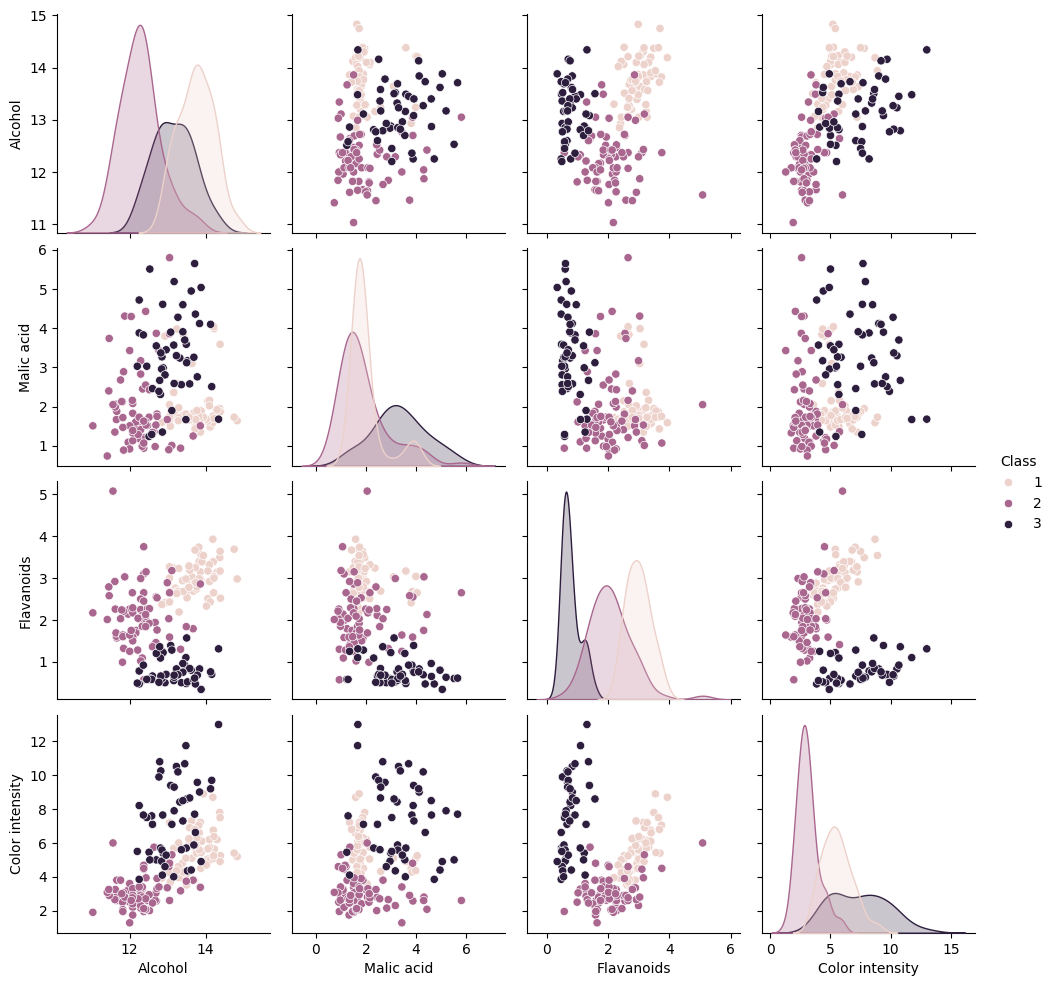

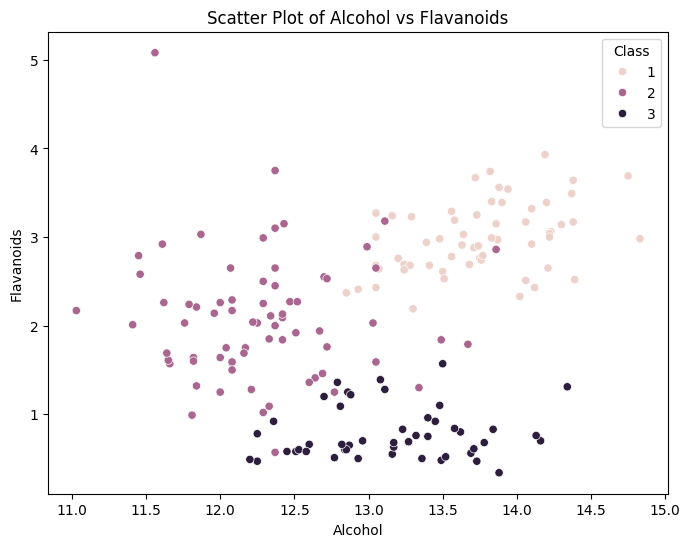

Missing values per column:
 Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64
X_train shape: (142, 13)
X_test shape: (36, 13)
y_train shape: (142,)
y_test shape: (36,)


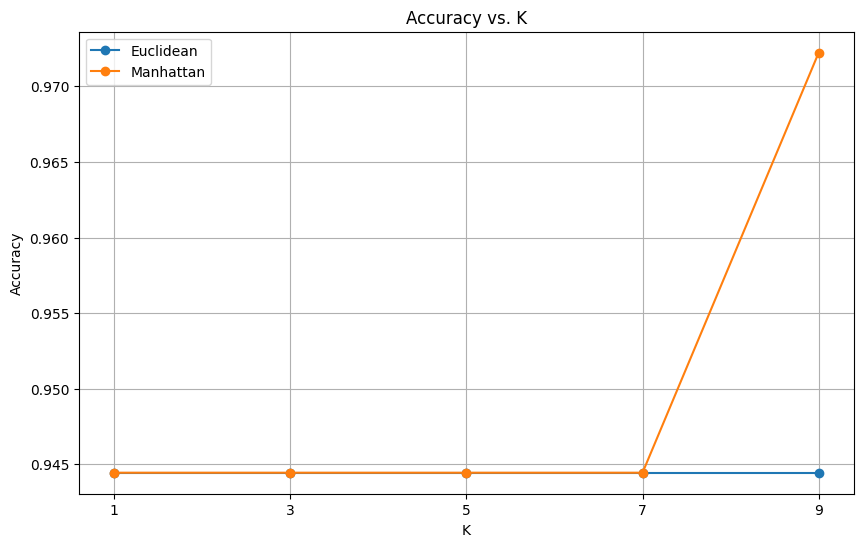

Confusion Matrix (K=5, Euclidean):
[[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]

Classification Report (K=5, Euclidean):
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.86      0.92        14
           3       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



In [26]:
# k-NN Classifier Analysis
#This project applies the k-Nearest Neighbors (k-NN) algorithm to the UCI Wine dataset and compares different distance metrics.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


# Download the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
response = urllib.request.urlopen(url)
data = response.read()

# Load the dataset into a Pandas DataFrame
column_names = [
    "Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium",
    "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins",
    "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"
]
df = pd.read_csv(io.BytesIO(data), names=column_names)

# Visualize some features
features_to_visualize = ["Alcohol", "Malic acid", "Flavanoids", "Color intensity"]


# Pair plot for observing feature overlaps
sns.pairplot(df, hue="Class", vars=features_to_visualize)
plt.show()


# Scatter plot of two features
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Alcohol", y="Flavanoids", hue="Class", data=df)
plt.title("Scatter Plot of Alcohol vs Flavanoids")
plt.show()
# Separate features (X) and target (y)
X = df.drop("Class", axis=1)
y = df["Class"]

# Check for missing values
print("Missing values per column:\n", X.isnull().sum())

# No missing values found in this dataset

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


k_values = [1, 3, 5, 7, 9]
distance_metrics = {"Euclidean": euclidean_distance, "Manhattan": manhattan_distance}
results = {}

for metric_name, metric_func in distance_metrics.items():
    accuracies = []
    for k in k_values:
        y_pred = knn_classifier(X_train, y_train, X_test, k, metric_func)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    results[metric_name] = accuracies

# Plotting Accuracy vs. K
plt.figure(figsize=(10, 6))
for metric_name, accuracies in results.items():
    plt.plot(k_values, accuracies, marker='o', label=metric_name)
plt.title("Accuracy vs. K")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# Example: Confusion Matrix and Classification Report for K=5 and Euclidean distance
k_example = 5
metric_example = euclidean_distance
y_pred_example = knn_classifier(X_train, y_train, X_test, k_example, metric_example)
print("Confusion Matrix (K=5, Euclidean):")
print(confusion_matrix(y_test, y_pred_example))
print("\nClassification Report (K=5, Euclidean):")
print(classification_report(y_test, y_pred_example))